In [271]:
import requests as rq
import numpy as np
import pandas as pd
import linecache 
import matplotlib.pyplot as plot


<a id='toc'></a>
## Table of Contents
<ul>
<li><a href="#gather">Gathering</a></li>
<li><a href="#assess">Assessing</a></li>
<li><a href="#clean">Cleaning</a></li>
<li><a href="#store">Storing</a></li>   
<li><a href="#eda">Analysis</a></li>
<li><a href="#plot">Visualizing</a></li>
</ul>

<a id='gather'></a>
## Gathering ##

<a href="#toc">go above</a>

As requested in the project details, I get the data from the following sources:

### csv source: WeRateDogs Twitter archive  ### 

In [272]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

### tsv source: image predictions ###

In [273]:
img_predictions = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = rq.get(img_predictions)

In [274]:
r.status_code

200

In [275]:
with open('image-predictions.tsv', 'wb') as f:
        f.write(r.content)

In [276]:
img_predictions_df  = pd.read_csv('image-predictions.tsv', sep= '\t')

### json source: querying the Twitter API ###

Using the code facilitated for this project (`twitter_api.py`), I downloaded json data for the tweet IDs contained in source one above. Once in the text file, I used the read_json function of Pandas:

In [277]:
json_df = pd.read_json('tweet_json.txt', lines = True )

<a id='assess'></a>

## Assesing ##
<a href="#toc">go above</a>

> Detect and document at least eight (8) quality issues 
 and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook.
 To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

First, I proceed to look at the essential information concerning the three dataframes I just created. I do this, by invoking `info()` and `shape` for each df.

In [278]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [279]:
archive_df.text.head()

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

In [280]:
archive_df.shape

(2356, 17)

In [281]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [282]:
img_predictions_df.shape

(2075, 12)

We see all entries in the predictions data frame has a valid URL 

In [283]:
img_predictions_df.jpg_url.str.count('http').size

2075

In [284]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [285]:
json_df.shape

(2331, 32)

The information above leaves us that the image predictions data frame has the least information with 2075 rows, next we have the json one with 2351, and finally the archive with 2356.

### Visual assessment ####
With our dataframes loaded, we can do a visual assessment, to get familiar with the data:

In [286]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1641,684122891630342144,NaN,NaN,2016-01-04 21:23:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene of two pups that want nothi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684122891...,11,10,None,None,None,None,None
1222,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714258258...,10,10,Travis,None,None,None,None
1841,675878199931371520,NaN,NaN,2015-12-13 03:21:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Ok, I'll admit this is a pretty adorable bunny...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675878199...,11,10,None,None,None,None,None
851,765669560888528897,NaN,NaN,2016-08-16 22:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tove. She's a Balsamic Poinsetter. Sur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765669560...,12,10,Tove,None,None,None,None
504,813051746834595840,NaN,NaN,2016-12-25 16:00:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bauer. He had nothing to do with the c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813051746...,13,10,Bauer,None,None,None,None


In [287]:
display(archive_df.rating_numerator.value_counts(ascending=False))
display(archive_df.rating_denominator.value_counts(ascending=False))

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [288]:
display(archive_df.doggo.value_counts(),  archive_df.floofer.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64

None       2346
floofer      10
Name: floofer, dtype: int64

In [289]:
display(archive_df.pupper.value_counts(), archive_df.puppo.value_counts())

None      2099
pupper     257
Name: pupper, dtype: int64

None     2326
puppo      30
Name: puppo, dtype: int64

In [290]:
predicate = archive_df.retweeted_status_id.isnull() == False
archive_df[predicate][['retweeted_status_id','retweeted_status_user_id','timestamp','retweeted_status_timestamp']]

,retweeted_status_id,retweeted_status_user_id,timestamp,retweeted_status_timestamp
19,8.874740e+17,4.196984e+09,2017-07-21 01:02:36 +0000,2017-07-19 00:47:34 +0000
32,8.860537e+17,1.960740e+07,2017-07-15 02:45:48 +0000,2017-07-15 02:44:07 +0000
36,8.305833e+17,4.196984e+09,2017-07-13 01:35:06 +0000,2017-02-12 01:04:29 +0000
68,8.780576e+17,4.196984e+09,2017-06-26 00:13:58 +0000,2017-06-23 01:10:23 +0000
73,8.782815e+17,4.196984e+09,2017-06-24 00:09:53 +0000,2017-06-23 16:00:04 +0000
...,...,...,...,...
1023,6.678667e+17,4.196984e+09,2016-06-25 01:52:36 +0000,2015-11-21 00:46:50 +0000
1043,6.671383e+17,4.196984e+09,2016-06-17 16:01:16 +0000,2015-11-19 00:32:12 +0000
1242,7.119983e+17,7.832140e+05,2016-03-21 19:31:59 +0000,2016-03-21 19:29:52 +0000
2259,6.675487e+17,4.296832e+09,2015-11-20 03:51:52 +0000,2015-11-20 03:43:06 +0000


In [291]:
display(archive_df[archive_df.rating_denominator == 0])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [292]:
archive_df[['timestamp', 'tweet_id']].head()

,timestamp,tweet_id
0,2017-08-01 16:23:56 +0000,892420643555336193
1,2017-08-01 00:17:27 +0000,892177421306343426
2,2017-07-31 00:18:03 +0000,891815181378084864
3,2017-07-30 15:58:51 +0000,891689557279858688
4,2017-07-29 16:00:24 +0000,891327558926688256


In [293]:
img_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
914,700890391244103680,https://pbs.twimg.com/media/CboQFolWIAE04qE.jpg,1,white_wolf,0.166563,False,schipperke,0.122356,True,West_Highland_white_terrier,0.119247,True
1563,793601777308463104,https://pbs.twimg.com/media/CwNwmxvXEAEJ54Z.jpg,1,miniature_pinscher,0.538981,True,Chihuahua,0.217830,True,toy_terrier,0.089149,True
1844,838916489579200512,https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg,2,web_site,0.993651,False,monitor,0.001406,False,envelope,0.001093,False
1784,829141528400556032,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,2,golden_retriever,0.573140,True,cocker_spaniel,0.111159,True,gibbon,0.094127,False
153,668655139528511488,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,1,beagle,0.319110,True,Italian_greyhound,0.103338,True,basenji,0.091930,True


In [294]:
img_predictions_df['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
radio_telescope         1
standard_schnauzer      1
trombone                1
china_cabinet           1
wooden_spoon            1
Name: p1, Length: 378, dtype: int64

In [295]:
img_predictions_df[img_predictions_df['p1_dog'] == False].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1148,731156023742988288,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
1320,756288534030475264,https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg,3,conch,0.925621,False,French_bulldog,0.032492,True,tiger_cat,0.006679,False
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
433,674318007229923329,https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg,1,porcupine,0.846628,False,hamster,0.038136,False,echidna,0.014680,False
832,693647888581312512,https://pbs.twimg.com/media/CaBVE80WAAA8sGk.jpg,1,washbasin,0.272451,False,doormat,0.165871,False,bathtub,0.066368,False


In [296]:
img_predictions_df.p1_conf[img_predictions_df['p1_dog'] == False].describe() #value_counts(ascending=False)


count    543.000000
mean       0.540167
std        0.294639
min        0.059033
25%        0.280340
50%        0.493257
75%        0.821904
max        1.000000
Name: p1_conf, dtype: float64

In [297]:
img_predictions_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [298]:
json_df.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
766,2016-09-10 23:54:11+00:00,774757898236878852,774757898236878848,This is Finley. She's a Beneboop Cumbersplash....,False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 774757887117852673, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2302,2015-11-17 00:06:54+00:00,666407126856765440,666407126856765440,This is a southern Vesuvius bumblegruff. Can d...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666407121513275392, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1824,2015-12-12 20:57:34+00:00,675781562965868544,675781562965868544,Say hello to Buddah. He was Waldo for Hallowee...,False,"[0, 78]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675781559312506880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
301,2017-02-24 15:40:31+00:00,835152434251116546,835152434251116544,When you're so blinded by your systematic plag...,False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 835152428160978949, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1196,2016-03-29 00:12:05+00:00,714606013974974464,714606013974974464,Here are two lil cuddly puppers. Both 12/10 wo...,False,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 714606006421028867, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [299]:
#json_df[json_df.retweeted_status_id.isnull() == False]#.sample(3)
#json_df[.value_counts() ==]
display('favorite count stats')
display( json_df.favorite_count.describe())
display('retweet count stats')
display(json_df.retweet_count.describe())

'favorite count stats'

count      2331.000000
mean       7313.800944
std       11360.113285
min           0.000000
25%        1267.500000
50%        3173.000000
75%        8943.000000
max      150569.000000
Name: favorite_count, dtype: float64

'retweet count stats'

count     2331.000000
mean      2589.400686
std       4380.175260
min          1.000000
25%        525.000000
50%       1207.000000
75%       2998.000000
max      74314.000000
Name: retweet_count, dtype: float64

In [300]:
json_df.retweeted.value_counts()

False    2331
Name: retweeted, dtype: int64

In [301]:
json_df[['created_at', 'id']].head()

,created_at,id
0,2017-08-01 16:23:56+00:00,892420643555336193
1,2017-08-01 00:17:27+00:00,892177421306343426
2,2017-07-31 00:18:03+00:00,891815181378084864
3,2017-07-30 15:58:51+00:00,891689557279858688
4,2017-07-29 16:00:24+00:00,891327558926688256


In [302]:
display(archive_df.text[1], json_df.full_text[1])

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [303]:
archive_df.text.str.count('http').shape

(2356,)

### Issues observed ###
From the (visual) assesment above, I can observe the following issues:

For the **archive dataset**:
* the following columns have missing values

 `1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object`

* I interpret records with values in `['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']` as retweets, thus these entries won't be part of this project, as per the context given (sic."**You only want original ratings (no retweets) that have images**." )

* The actual rating for the dogs is missing. According to the context of the project, it should be obtained from : rating_numerator / rating_denominator; prior to calculating the rating, the the rating denominator must be fixed to **prevent a division by 0.** when calculating. 

* `text` column contains also numerator and denominator for the rating, plus the tweet url 

* The `source` column does not seem to add much, since only four possible values appear, and they refer to the device type(?) used to send the tweet.

* If I understand well, a dog can be either a doggo, a floofer, a pupper, or a puppo. This means the columns `doggo	floofer	pupper	puppo` can be converted(?) into a "stage" one?



For the **image predictions dataset**:

* img_predictions_df.jpg_url.value_counts() yields some image URL appear more than once, is this an issue?

* column `p1_dog` decides whether the entry can be regarded as a dog, yes or no. If columns `p1_*` is the algorithm's #1 prediction for the image in the tweet, what I observe is that the image cannot be correctly predicted since there might be a dog in the image, but often is not the main subject in the image. Therefore, I would remove those entries where 'p1_dog' is set to False, since the confidence level(s) will be *low* (i.e. 75% of samples are 0.82 (or below) confidence level p1).

For the **json dataset**:

* the tweet id column is called `id` only. I prefer to rename it to `tweet_id` for consistency with other dataframes for further manipulation.
* the following columns have missing values

 `9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_str      77 non-null     float64            
 11  in_reply_to_user_id            77 non-null     float64            
 12  in_reply_to_user_id_str        77 non-null     float64            
 13  in_reply_to_screen_name        77 non-null     object    
 15  geo                            0 non-null      float64            
 16  coordinates                    0 non-null      float64            
 17  place                          1 non-null      object             
 18  contributors                   0 non-null      float64 
 24  possibly_sensitive             2197 non-null   float64            
 25  possibly_sensitive_appealable  2197 non-null   float64 
 27  retweeted_status               163 non-null    object             
 28  quoted_status_id               26 non-null     float64            
 29  quoted_status_id_str           26 non-null     float64            
 30  quoted_status_permalink        26 non-null     object             
 31  quoted_status                  24 non-null     object `
 
   Moreover, since the requested columns from this data source are just three, the dataset needs to be pruned to keep only the incumbent columns (i.e. `tweet ID, retweet count, and favorite count`)

<a id='clean'></id>

## Cleaning ##

<a href="#toc">go above</a>

Once identified the issues with the sources above, I start off this cleaning section doing a backup of the "original" dataframes:

> Cleaning includes merging individual pieces of data according to the rules of tidy data.

In [304]:
archive_clean_df = archive_df
images_clean_df  = img_predictions_df
json_clean_df = json_df

### Cleaning Twitter archive dataframe ##

**Define** : Extract the URL of the text,  and remove them from the text field. I could not stablish `expanded_urls` direct to the same URLs in the `text` field, so I decided to create a new field, called `url_in_text`.

In [305]:
pattern = r'(https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*))'

In [306]:
archive_clean_df['url_in_text'] = archive_clean_df.text.str.extract(pattern, expand=True)[0]

In [307]:
display(archive_clean_df.url_in_text.tail(3), archive_clean_df.expanded_urls.tail(3))

2353    https://t.co/y671yMhoiR
2354    https://t.co/r7mOb2m0UI
2355    https://t.co/BLDqew2Ijj
Name: url_in_text, dtype: object

2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, dtype: object

In [308]:
archive_clean_df.text = archive_clean_df.text.str.replace(pattern, '', regex=True)

**Test**: Looking for occurrences URL pattern should return 0

In [309]:
archive_clean_df.text.str.count(pattern).sum()

0

**Define** : calculate the actual rating of each tweet entry. Having both numerator and denominator for each tweet, we are missing the actual numerical value of the rating.

Prior to do that, we must avoid a division by zero, so I will replace those denominators = 0 with the value of the numerator.

In [310]:
archive_clean_df['rating_denominator'][archive_clean_df.rating_denominator == 0] = archive_clean_df.rating_numerator

<ipython-input-310-f6f092e08a19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean_df['rating_denominator'][archive_clean_df.rating_denominator == 0] = archive_clean_df.rating_numerator


**Test**. Querying the dataframe for an entry with denominator = 0 should give an empty result

In [311]:
#archive_clean_df.iloc[313,:]
archive_clean_df[archive_clean_df.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url_in_text


Next, we proceed to create the actual `rating` column in the dataframe:

In [312]:
archive_clean_df['rating'] = archive_clean_df.rating_numerator / archive_clean_df.rating_denominator
display(archive_clean_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

None

In [313]:
archive_clean_df[['text', 'rating', 'url_in_text','doggo', 'floofer', 'pupper', 'puppo' ]].head()

,text,rating,url_in_text,doggo,floofer,pupper,puppo
0,This is Phineas. He's a mystical boy. Only eve...,1.3,https://t.co/MgUWQ76dJU,None,None,None,None
1,This is Tilly. She's just checking pup on you....,1.3,https://t.co/0Xxu71qeIV,None,None,None,None
2,This is Archie. He is a rare Norwegian Pouncin...,1.2,https://t.co/wUnZnhtVJB,None,None,None,None
3,This is Darla. She commenced a snooze mid meal...,1.3,https://t.co/tD36da7qLQ,None,None,None,None
4,This is Franklin. He would like you to stop ca...,1.2,https://t.co/AtUZn91f7f,None,None,None,None


**Define**: Remove retweet-related rows, since the [project's keypoints] (https://bit.ly/3rdSXFj) state retweets are not to be considered

In [314]:
list_of_rows = archive_clean_df[archive_clean_df.retweeted_status_id.isnull() == False].index
archive_clean_df.drop(list_of_rows, inplace=True)

**Test**: looking for rows with retweet_status.isnull() should retrieve an empty result

In [315]:
archive_clean_df[archive_clean_df.retweeted_status_id.isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url_in_text,rating


**Define**: Tidy up the [`doggo    floofer    pupper    puppo `] columns to have these categories into a `stage` column. Once `stage` is created, remove the other four columns.

In [316]:
archive_clean_df['stage'] = archive_clean_df.doggo +  ', ' + archive_clean_df.floofer +  ', ' + archive_clean_df.pupper +  ', ' + archive_clean_df.puppo
display(archive_clean_df['stage'].value_counts())

None, None, None, None        1831
None, None, pupper, None       224
doggo, None, None, None         75
None, None, None, puppo         24
doggo, None, pupper, None       10
None, floofer, None, None        9
doggo, floofer, None, None       1
doggo, None, None, puppo         1
Name: stage, dtype: int64

Now, I get rid of the ocurrences of `None` and `, `

In [317]:
pattern = r"None(\,\s)?"
archive_clean_df.stage = archive_clean_df.stage.str.replace(pattern, '',  regex=True).str.strip()
#get rid of trailing ','
archive_clean_df.stage = archive_clean_df.stage.str.replace(r"\,$", '',  regex=True)

Now that we have the `stage` column, we get the value counts of the columns being replaced, prior to getting rif of them:

In [318]:
display (archive_clean_df.floofer.value_counts() , archive_clean_df.doggo.value_counts(),\
         archive_clean_df.pupper.value_counts(), archive_clean_df.puppo.value_counts())

None       2165
floofer      10
Name: floofer, dtype: int64

None     2088
doggo      87
Name: doggo, dtype: int64

None      1941
pupper     234
Name: pupper, dtype: int64

None     2150
puppo      25
Name: puppo, dtype: int64

In [319]:
archive_clean_df.drop(labels= ['floofer', 'doggo', 'pupper', 'puppo'], inplace= True, axis=1)

**Test**: the value counts for each  of the `doggo  floofer  pupper  puppo`  columns should match those in the new 'stage'. The actual count turned out to be more however, due to the "combined" stages of doggo and either of {floofer | pupper | puppo}

In [320]:
#.shape
#drop_me.str.findall(pattern, flags=re.IGNORECASE)
display(archive_clean_df.stage.value_counts())
display(archive_clean_df.info())

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  url_in_text                 2117 

None

**Define**: Remove `source` column, as the values store do not seem to add much insight into the dogs analysis. In the datasource provided, we obvserve four different values for this column:

In [321]:
archive_clean_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Which all seem to indicate the device or mode used to tweet the data. Those options do not provide (in my opinion) further aid to do an analysis of the dog-related information. Therefore, I proceed to remove it:

In [322]:
archive_clean_df.drop(labels=['source'], axis=1, inplace=True)

**Test**: now the column must be removed

In [323]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   text                        2175 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               2117 non-null   object 
 9   rating_numerator            2175 non-null   int64  
 10  rating_denominator          2175 non-null   int64  
 11  name                        2175 non-null   object 
 12  url_in_text                 2117 non-null   object 
 13  rating                      2175 

### Cleaning images dataframe ##

**Define**: Remove those rows where `p1_dog` is set to `False` being the rationale as follows: column 'p1_dog' decides whether the entry can be regarded as a dog, yes or no. If columns p1* is the algorithm's #1 prediction for the image in the tweet, what I observe is that 'p1_dog' = False, the image cannot be correctly predicted since there might be a dog in the image, but often is not the main subject in the image. 

In [324]:
false_predict_df = images_clean_df[images_clean_df.p1_dog == False]
false_predict_df.shape

(543, 12)

In [325]:
#display(false_predict_df.index, false_predict_df.head())
images_clean_df.drop( false_predict_df.index, inplace=True)

**Test**: The following selection should return 0 rows in the images_clean dataframe

In [326]:
images_clean_df[images_clean_df.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Cleaning json dataframe ##

**Define**: Remove non interesting columns from json dataframe, i.e. those not required by the rubric and with missing values.

In [327]:
json_clean_df.drop(labels= ['created_at', 'full_text', 'id_str', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status', 'favorited',
       'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'lang', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'quoted_status'], inplace= True, axis=1)

**Test**: there should only be three columns left in the dataframe

In [328]:
json_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


**Define**: Rename column `id` for `tweet_id`

In [329]:
json_clean_df.rename(columns={"id": "tweet_id"}, inplace=True)

Test:

In [330]:
json_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


<a id='store'></id>
## Storing ##
<a href="#toc">go above</a>

> the clean files have to be joined and eventually save to a twitter_archive_master.csv

In [331]:
#merge  archive_clean_df with json_clean_d
master_df = archive_clean_df.merge(json_clean_df, how = 'left', right_on='tweet_id', left_on= 'tweet_id')
    
#join images_clean_df to archive_clean_df
master_df = master_df.merge(images_clean_df, how= 'left', left_on='tweet_id', right_on='tweet_id')

**Test** : The total number of colums should be  = to the sum of columns of all three dataframes, `i.e., len(archive_clean_df.columns) + len(images_clean_df.columns)  + len(json_clean_df.columns)` , minus two (the tweet_id in each of the merged datasets)

In [332]:
len(archive_clean_df.columns) + len(images_clean_df.columns)  + len(json_clean_df.columns)

30

In [333]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   text                        2175 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               2117 non-null   object 
 9   rating_numerator            2175 non-null   int64  
 10  rating_denominator          2175 non-null   int64  
 11  name                        2175 non-null   object 
 12  url_in_text                 2117 non-null   object 
 13  rating                      2175 

Comparing to the original data types, I observe  img_num  , favorite_count  and retweet_count are float 64 now, so before saving to masterdata file, I will change their type back to int64:

In [334]:
master_df.favorite_count.fillna(0, downcast='infer', inplace=True)
master_df.retweet_count.fillna(0, downcast='infer', inplace=True)
master_df.img_num.fillna(0, downcast='infer', inplace=True)

In [335]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   text                        2175 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               2117 non-null   object 
 9   rating_numerator            2175 non-null   int64  
 10  rating_denominator          2175 non-null   int64  
 11  name                        2175 non-null   object 
 12  url_in_text                 2117 non-null   object 
 13  rating                      2175 

In [336]:
master_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


And then we save it to the requested filename:

In [337]:
master_df.to_csv( 'twitter_archive_master.csv', index=False)

<a id='eda'></id>
## Analyzing ##



I want to answer the three following questions:

 1) what's the dog best rated in the dataset. IN case of a tie, what;s the most recent?
 
 2) what's the dog worst rated in the dataset. IN case of a tie, what;s the most recent?
 
 3) what's the dog with more favorite tweets counts?

In order to anwer the three questions above, first I get an impression of the ratings in the dataset:

In [338]:
archive_clean_df[['rating_numerator', 'rating_denominator', 'rating']].head()

,rating_numerator,rating_denominator,rating
0,13,10,1.3
1,13,10,1.3
2,12,10,1.2
3,13,10,1.3
4,12,10,1.2


In [339]:
display(archive_clean_df.rating.describe(),archive_clean_df.rating.value_counts())

count    2175.000000
mean        1.223295
std         4.246757
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

1.200000      504
1.000000      445
1.100000      431
1.300000      307
0.900000      156
0.800000       98
0.700000       53
1.400000       43
0.500000       37
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        7
42.000000       2
0.000000        2
2.600000        1
2.700000        1
18.200000       1
1.500000        1
7.500000        1
1.700000        1
66.600000       1
177.600000      1
3.428571        1
0.733333        1
1.250000        1
0.818182        1
0.636364        1
Name: rating, dtype: int64

and we have a winner! Below the data of the tweet with the max rating value of 177.600000:

In [340]:
master_df[master_df.rating == master_df.rating.max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
804,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [341]:
display(master_df.timestamp.min(), master_df.timestamp.max())

'2015-11-15 22:32:08 +0000'

'2017-08-01 16:23:56 +0000'

In [342]:
master_df[master_df.rating == master_df.rating.min()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
265,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [343]:
master_df.url_in_text[master_df.rating == master_df.rating.min()]

265    https://t.co/YbEJPkg4Ag
840    https://t.co/c7WXaB2nqX
Name: url_in_text, dtype: object

Sticking to my criteria previously defined of choosing the most recent tweet based on the timestamp, the row with index 265 abovef has the upper hand. 
When I visited the tweet's url, a number of surprising insights appeared:

1. The @dog_rates tweet critisizes a twee plagiarized by another user (a bot maybe). 
2. The plagiarized tweet is very innacurate about the weekday: *feb. 24th, 2017 was Friday instead of Monday* ( that explains @dog_rates comment 😃)

And for the last question above, here's the tweet with the most favorite_count:

In [344]:
master_df[master_df.favorite_count == master_df.favorite_count.max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
862,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [345]:
master_df.url_in_text[master_df.favorite_count == master_df.favorite_count.max()]

862    https://t.co/7wE9LTEXC4
Name: url_in_text, dtype: object

With over 150+ thousand hearts, if you watch the video in the tweet, you will understand why that *doggo* is a record breaker...

<a id='plot'></id>
## Visualizing ##
<a href="#toc">go above</a>

There are many dog breeds in the dataset being treated. However, to get a feeling of the most popular ones, below I plot distribution of tweets for the top 10 breeds:

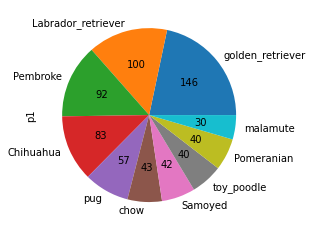

In [346]:
%matplotlib inline
def absolute_value(val):
    a  = int(np.round(val/100.*images_clean_df.p1.value_counts()[:10] .sum(), 0))
    return a

master_df.p1.value_counts()[:10].plot(kind='pie', autopct=absolute_value);